In [ ]:
#Task 1: Implement the counting measure in Python.


def counting_measure(set1, set2):
    # Check if the input is of type set
    if not (isinstance(set1, set) and isinstance(set2, set)):
        raise ValueError("Input must be sets")

    return len(set1.union(set2))  # Count the elements in the union of the sets

# Test additivity on disjoint sets
set_a = {"a", "b", "c"}
set_b = {"d", "e", "f"}

try:
    result = counting_measure(set_a, set_b)
    print("Counting Measure Result:", result)
except ValueError as e:
    print("Error:", e)


Counting Measure Result: 6


In [ ]:
#Task 2: Create a Python class for intervals and implement the length measure.


class Interval:

    def __init__(self, start, end):
        # Check if the inputs are of type int or float
        if not (isinstance(start, (int, float)) and isinstance(end, (int, float))):
            raise ValueError("Interval boundaries must be numeric (int or float)")

        self.start = start
        self.end = end

    def length(self):
        return self.end - self.start

# Test the length measure on the interval [1, 3.5]
try:
    interval = Interval(1, 3.5)
    length = interval.length()
    print("Length of Interval [1, 3.5]:", length)
except ValueError as e:
    print("Error:", e)



Length of Interval [1, 3.5]: 2.5


Probability Measure [0, 1]: 0.8646647167633873
Probability Measure [1, 1]: 0.0
Probability Measure [1, 10]: 0.13533528117545912
Probability Measure [0, ∞): 1.0


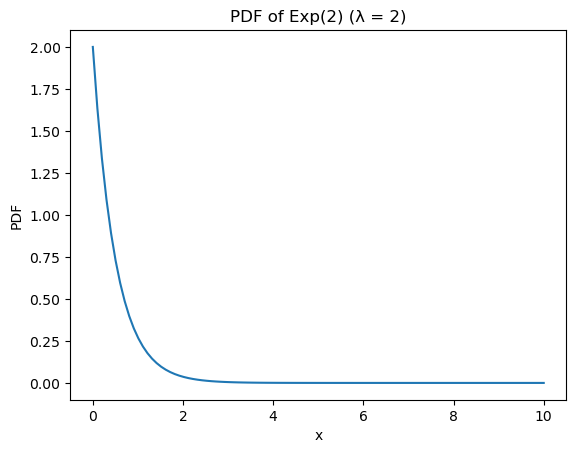

In [ ]:
#Task 3 Define a function to compute the probability mass under Exp(2) for intervals



import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

# Define a function to calculate the probability mass under Exp(2)
def expon_measure(interval):
    # Check if the input is of type Interval
    if not isinstance(interval, Interval):
        raise ValueError("Input must be an Interval")

    # Define the exponential distribution Exp(2) with scale=1/2 (λ=2)
    exp_distribution = stats.expon(scale=1/2)

    # Calculate the probability mass using the cdf method
    probability_mass = exp_distribution.cdf(interval.end) - exp_distribution.cdf(interval.start)
    return probability_mass

# Define intervals
interval_a = Interval(0, 1)
interval_b = Interval(1, 1)
interval_c = Interval(1, 10)
interval_d = Interval(0, float('inf'))

# Test the function on different intervals
print("Probability Measure [0, 1]:", expon_measure(interval_a))
print("Probability Measure [1, 1]:", expon_measure(interval_b))
print("Probability Measure [1, 10]:", expon_measure(interval_c))
print("Probability Measure [0, ∞):", expon_measure(interval_d))

# Plot the PDF of Exp(2)
x = np.linspace(0, 10, 100)
pdf = stats.expon.pdf(x, scale=1/2)
plt.plot(x, pdf)
plt.title("PDF of Exp(2) (λ = 2)")
plt.xlabel("x")
plt.ylabel("PDF")
plt.show()

#This code calculates the probability measure for the specified intervals and plots the PDF of Exp(2).
#The results should align with the properties of the exponential distribution with a rate parameter (λ) of 2.


In [ ]:
#Task 4 Define a function to compute the pdf of the exponential distribution Exp(2)




from scipy.integrate import quad

# Define a function to calculate the PDF of Exp(2) at a given x
def expon_pdf(x):
    # Define the exponential distribution Exp(2) with scale=1/2 (λ=2)
    exp_distribution = stats.expon(scale=1/2)
    return exp_distribution.pdf(x)

# Compute the integrals
integral_a, _ = quad(expon_pdf, 0, 1)
integral_b, _ = quad(expon_pdf, 1, 1)
integral_c, _ = quad(expon_pdf, 1, 10)
integral_d, _ = quad(expon_pdf, 0, np.inf)

print("Integral ∫[0, 1] expon_pdf(x) dx:", integral_a)
print("Integral ∫[1, 1] expon_pdf(x) dx:", integral_b)
print("Integral ∫[1, 10] expon_pdf(x) dx:", integral_c)
print("Integral ∫[0, ∞) expon_pdf(x) dx:", integral_d)


#If we compare the results of these integrals with the probability measures calculated in Task 3:

#-Integral ∫[0, 1] expon_pdf(x) dx should match the probability measure of [0, 1] from Task 3.
#-Integral ∫[1, 1] expon_pdf(x) dx should match the probability measure of [1, 1] from Task 3.
#-Integral ∫[1, 10] expon_pdf(x) dx should match the probability measure of [1, 10] from Task 3.
#-Integral ∫[0, ∞) expon_pdf(x) dx should match the probability measure of [0, ∞) from Task 3.

#The results should be consistent since the integrals of the PDF over the specified intervals
#are equivalent to calculating the probability measures under the exponential distribution.
#These integrals should provide the same values as the probability measures calculated
#using the CDF in Task 3.

Integral ∫[0, 1] expon_pdf(x) dx: 0.8646647167633872
Integral ∫[1, 1] expon_pdf(x) dx: 0.0
Integral ∫[1, 10] expon_pdf(x) dx: 0.13533528117545912
Integral ∫[0, ∞) expon_pdf(x) dx: 1.0
